In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
keras.__version__

'2.8.0'

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

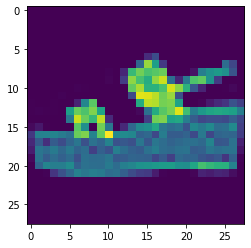

In [ ]:
plt.imshow(X_train_full[12])

In [ ]:
y_train_full[12]

5

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train_full[12]]

'Sandal'

In [ ]:
X_train_full[12] # 28X28 pixels for the image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# Normalisation
X_train_n = X_train_full / 255.0
X_test_n = X_test / 255.0

In [ ]:
# Split into Train, Test
X_valid, X_train = X_train_n[:5000], X_train_n[5000:] # :5000 0 to 5000 AND 5000: 5001 to 60000
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [ ]:
X_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
#X_valid[12]

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # ip layer / Flatten for 2D 28X28 px into 784 px in 1D array
model.add(keras.layers.Dense(300, activation="relu")) # Hidden Layer 1
model.add(keras.layers.Dense(100, activation="relu")) # Hidden Layer 2
model.add(keras.layers.Dense(10, activation="softmax")) # Output Layer

# relu: =0 for -ve ips, =ip for +ve ips
# softmax: creates sum of all class probablity to =1

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


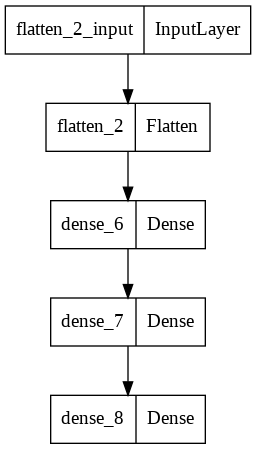

In [ ]:
import pydot
keras.utils.plot_model(model)

In [ ]:
weights, biases = model.layers[1].get_weights()

In [ ]:
weights

array([[-0.03867384, -0.01020111, -0.04275878, ...,  0.07054734,
         0.03083804,  0.05160488],
       [-0.05400597,  0.03876452, -0.05071373, ...,  0.06856062,
         0.02788132, -0.02353792],
       [ 0.04159619, -0.04066479,  0.01995716, ...,  0.01278637,
         0.01107106, -0.00735874],
       ...,
       [-0.00467096, -0.0156375 , -0.0515823 , ...,  0.03529847,
         0.04496175, -0.03659218],
       [-0.03713356, -0.06973334, -0.00790974, ..., -0.07283842,
         0.05496506,  0.06582728],
       [-0.06931669, -0.06395248, -0.01705135, ..., -0.07314742,
        -0.03929092,  0.01236711]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7257 - accuracy: 0.7639 - val_loss: 0.4985 - val_accuracy: 0.8346
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4885 - accuracy: 0.8301 - val_loss: 0.4565 - val_accuracy: 0.8452
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4440 - accuracy: 0.8433 - val_loss: 0.4174 - val_accuracy: 0.8602
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4155 - accuracy: 0.8535 - val_loss: 0.3914 - val_accuracy: 0.8674
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3958 - accuracy: 0.8601 - val_loss: 0.3805 - val_accuracy: 0.8702
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3788 - accuracy: 0.8660 - val_loss: 0.3736 - val_accuracy: 0.8678
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3652 - accuracy: 0.8706 - val_loss: 0.3580 - val_accuracy:

In [ ]:
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
model_history.history

{'accuracy': [0.7638909220695496,
  0.8300727009773254,
  0.8433272838592529,
  0.8535090684890747,
  0.8600909113883972,
  0.8659818172454834,
  0.8705818057060242,
  0.8748182058334351,
  0.8773272633552551,
  0.8804000020027161,
  0.8820909261703491,
  0.8877272605895996,
  0.8879636526107788,
  0.890781819820404,
  0.893781840801239,
  0.8959454298019409,
  0.8967818021774292,
  0.8985090851783752,
  0.8992727398872375,
  0.9012908935546875,
  0.9038181900978088,
  0.9052545428276062,
  0.9063090682029724,
  0.9083272814750671,
  0.9101091027259827,
  0.9119091033935547,
  0.9122545719146729,
  0.9154182076454163,
  0.9162363409996033,
  0.9161454439163208],
 'loss': [0.7256804704666138,
  0.4884727895259857,
  0.443991094827652,
  0.4155213534832001,
  0.3957909941673279,
  0.37875381112098694,
  0.3651556670665741,
  0.35297703742980957,
  0.343235045671463,
  0.3347097933292389,
  0.3266301453113556,
  0.3175835907459259,
  0.3113299012184143,
  0.3050205707550049,
  0.297681748

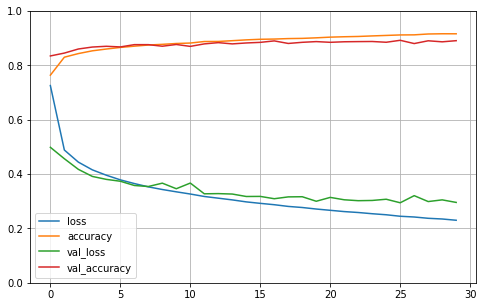

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Y axis between 0 and 1
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3279 - accuracy: 0.8811


[0.32792139053344727, 0.8810999989509583]

Random Test for 3 samples

In [ ]:
X_new = X_test[:3]

In [ ]:
y_proba = model.predict(X_new) # Predict in probablity
y_proba.round(2) # 

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
#y_pred = model.predict_classes(X_new) # Predict in classes
y_pred=np.argmax(model.predict(X_new),axis=1)
y_pred

array([9, 2, 1])

Since the positions in above array were maxm for these values

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


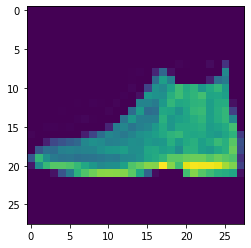

In [ ]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


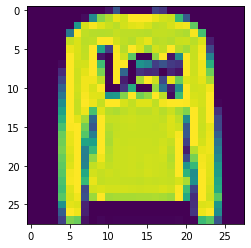

In [ ]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


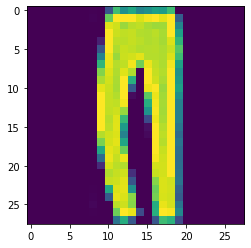

In [ ]:
print(plt.imshow(X_test[2]))